In [1]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
processed_data = pd.read_csv('data/anon_processed_unique_device_v3.csv')

In [3]:
processed_data

,device_id,event_date,install_date,campaign_id,creative_name,country,state,total_min_watched,impressions,clicks,...,VD,VE,VT,WA,WI,WV,WY,Z,ZAC,ZH
0,device_id_1000,2024-08-12,2024-08-12,campaign_id_1,creative_name_1,US,PA,87.00,6.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,device_id_100000,2024-08-31,2024-08-31,campaign_id_1,creative_name_1,US,PA,10.00,4.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,device_id_100009,2024-09-06,2024-09-06,campaign_id_1,creative_name_2,US,CA,1.00,6.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,device_id_100011,2024-08-03,2024-08-03,campaign_id_1,creative_name_1,US,IL,121.00,6.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,device_id_100013,2024-09-08,2024-09-08,campaign_id_1,creative_name_30,US,TX,46.00,4.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790840,device_id_952955,2024-10-03,2024-10-03,campaign_id_137,creative_name_140,US,PA,0.73,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
790841,device_id_953001,2024-10-02,2024-10-02,campaign_id_137,creative_name_138,US,CA,0.32,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
790842,device_id_909677,2024-07-08,2024-07-08,campaign_id_138,creative_name_108,US,CA,0.32,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
790843,device_id_948688,2024-06-22,2024-06-22,campaign_id_138,creative_name_106,US,NY,0.57,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [41]:

def ARIMAforecast(df,campaign_number=1,p=7,d=0,q=14,num_forecasts=30,predict_col = 'total_min_watched'):
    campaign_df = df.where(df['campaign_id']== ('campaign_id_' + str(campaign_number))).dropna(subset=['campaign_id'])
    ARIMAforecast = campaign_df.groupby(['event_date']).sum()
    graph_idea = ARIMAforecast[[predict_col]]
    
    order = (p,d,q) 
    num_forecasts = num_forecasts
    model = ARIMA(graph_idea, order = order)
    model_fit = model.fit()
    forecasts = model_fit.predict(start=len(graph_idea),end=len(graph_idea)+num_forecasts-1,dynamic=True)
    add = pd.DataFrame(forecasts)
    
    graph_idea.reset_index(inplace=True)
    newday = int(graph_idea.iloc[len(graph_idea)-1][0][-2:])
    basedate = graph_idea.iloc[len(graph_idea)-1][0][:-2]
    
    monthlength = {'06':30,'07':31,'08':31,'09':30,'10':31,'11':30}
    
    for i in range(len(add)):
        x = len(graph_idea)
        i2 = i + 1
        newday = newday + 1
        if len(str(newday)) < 2:
            day2 = '0' + str(newday)
        else:
            day2 = str(newday)
        date = basedate + day2
        if int(day2) > int(monthlength[date[5:-3]]):
            #if int(day2) > int(monthlength[date[5:-3]]):
            newmonth = int(date[5:-3]) + 1
            if len(str(newmonth)) < 2:
                newmonth = '0' + str(newmonth)
            else:
                newmonth = str(newmonth)
            basedate = '2024-' + newmonth + '-'
            date = basedate + '01'
            newday = 1
            #else:
            #    continue
        row = {'event_date': date, 'total_min_watched': add.iloc[i][0]}
        graph_idea = graph_idea._append(row, ignore_index = True)
    #forecasts
    graph_idea.set_index('event_date',inplace=True)
    return graph_idea
    

In [42]:
x = ARIMAforecast(processed_data)
#
x

C:\Users\chrss\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\chrss\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\chrss\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\chrss\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary startin

,total_min_watched
event_date,
2024-07-10,0.000000
2024-07-16,111.000000
2024-07-18,7.000000
2024-07-21,1.000000
2024-07-22,0.000000
...,...
2024-10-29,54655.528076
2024-10-30,54038.666011
2024-10-31,52600.951433


<AxesSubplot:xlabel='event_date'>

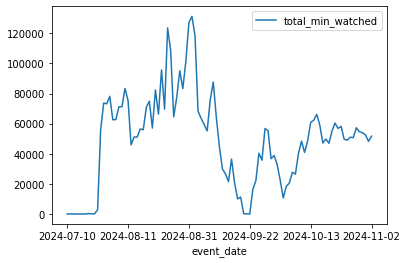

In [43]:
x.plot()